In [ ]:
import pandas as pd
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
employment_2019 = pd.read_csv('dataset/Punesimi-2019.csv')
employment_2020 = pd.read_csv('dataset/Punesimi-2020.csv')
employment_2021 = pd.read_csv('dataset/Punesimi-2021.csv')
employment_2022 = pd.read_csv('dataset/Punesimi-2022.csv')
employment_2023 = pd.read_csv('dataset/Punesimi-2023.csv')

In [ ]:
# Combine the datasets
employment_combined = pd.concat([employment_2019, employment_2020, employment_2021, employment_2022, employment_2023], ignore_index=True)
employment_combined.drop('Unnamed: 3', axis=1, inplace=True)

In [ ]:
# Translate column names to English
employment_combined['M(15-65+)'] = employment_combined[['M 15-24', 'M 25-34', 'M 35-44', 'M 45-54', 'M 55-64', 'M 65+']].sum(axis=1)
employment_combined['F(15-65+)'] = employment_combined[['F 15-24', 'F 25-34', 'F 35-44', 'F 45-54', 'F 55-64', 'F 65+']].sum(axis=1)
employment_combined['M+F']=employment_combined['M(15-65+)'] + employment_combined['F(15-65+)']
employment_combined['MonthYearISO'] =  employment_combined['Muaji \nMesec\nMonth'].astype(str) + '-' +employment_combined['Viti Godina Year'].astype(str).str.pad(width=2, fillchar='0')

print(employment_combined.head())

column_translations = {
    'Viti Godina Year': 'Year',
    'Muaji \nMesec\nMonth': 'Month',
    'MonthYearISO': 'Month-Year',
    'PERSHKRIMI I SEKTORIT\nOPIS SEKTORA\nSECTOR DESCRIPTION': 'Sector Description',
    'Statusi i regjistrimit \nStatus registracije Registration status': 'Registration Status',
    'Komuna Opstina Municipality': 'Municipality',
    'M+F': 'Number of Employees',
    'M(15-65+)': 'Men',
    'F(15-65+)': 'Women',
    'Mesat. Meshk \nProsecni M.\nAverage M.': 'Average Wage Men',
    'Mesat. Fem.\nProsecni F. Average F.': 'Average Wage Women'
}
employment_translated = employment_combined.rename(columns=column_translations).loc[:, list(column_translations.values())]

employment_translated.head(5)

   Viti Godina Year  Muaji \nMesec\nMonth  \
0              2019                     1   
1              2019                     1   
2              2019                     1   
3              2019                     1   
4              2019                     1   

  PERSHKRIMI I SEKTORIT\nOPIS SEKTORA\nSECTOR DESCRIPTION  \
0                                       Ndertimtaria        
1                                       Ndertimtaria        
2                                  Mungon aktiviteti        
3                                Industria nxjerrese        
4                               Industria perpunuese        

  Statusi i regjistrimit \nStatus registracije Registration status  \
0                                            SH.P.K.                 
1                                         Individual                 
2                                         Individual                 
3                                            SH.P.K.                 
4           

,Year,Month,Month-Year,Sector Description,Registration Status,Municipality,Number of Employees,Men,Women,Average Wage Men,Average Wage Women
0,2019,1,1-2019,Ndertimtaria,SH.P.K.,PRISHTINË,3449,2803,646,424.33,357.40
1,2019,1,1-2019,Ndertimtaria,Individual,SKENDERAJ,117,103,14,274.26,242.53
2,2019,1,1-2019,Mungon aktiviteti,Individual,VITI,1,0,1,NaN,170.00
3,2019,1,1-2019,Industria nxjerrese,SH.P.K.,PODUJEVË,8,8,0,177.50,NaN
4,2019,1,1-2019,Industria perpunuese,Individual,SHTIME,83,67,16,234.57,210.61


In [ ]:
employment_combined.info()
employment_combined.dtypes
employment_combined.describe(include='all')
employment_combined.count()

# export the combined dataset
employment_combined.to_csv('employment.csv', index=False)

employment_combined.head(5)
employment_combined.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88014 entries, 0 to 88013
Data columns (total 31 columns):
 #   Column                                                           Non-Null Count  Dtype  
---  ------                                                           --------------  -----  
 0   Viti Godina Year                                                 88014 non-null  int64  
 1   Muaji 
Mesec
Month                                               88014 non-null  int64  
 2   PERSHKRIMI I SEKTORIT
OPIS SEKTORA
SECTOR DESCRIPTION            88014 non-null  object 
 3   Statusi i regjistrimit 
Status registracije Registration status  88014 non-null  object 
 4   Komuna Opstina Municipality                                      88014 non-null  object 
 5   Nr Tatimp 
Poreski obveznik 
Number of Taxpayers                 88014 non-null  int64  
 6   Nr Puns
Broj zaposlenih 
Number of  employees                    88014 non-null  int64  
 7   Primar Primarna Primary                 

Viti Godina Year                                                        0
Muaji \nMesec\nMonth                                                    0
PERSHKRIMI I SEKTORIT\nOPIS SEKTORA\nSECTOR DESCRIPTION                 0
Statusi i regjistrimit \nStatus registracije Registration status        0
Komuna Opstina Municipality                                             0
Nr Tatimp \nPoreski obveznik \nNumber of Taxpayers                      0
Nr Puns\nBroj zaposlenih \nNumber of  employees                         0
Primar Primarna Primary                                                 0
Sekondar Sekundarna Secondary                                           0
Meshkuj\nMuskarci \nMen (M).                                            0
Femra\nZenske\nWomen (F)                                                0
Pa Verif \nNeprovereno \nUnverified                                     0
M 15-24                                                                 0
F 15-24                               

In [ ]:
# Correcting specific characters in the dataframe
employment_translated['Sector Description'] = employment_translated['Sector Description'].str.replace('Ã‹', 'Ë').replace('Ã‡', 'Ç')
employment_translated['Registration Status'] = employment_translated['Registration Status'].str.replace('Ã‹', 'Ë').replace('Ã‡', 'Ç')

employment_translated = employment_translated.dropna(subset=['Average Wage Men', 'Average Wage Women'], how='any')

employment_translated.loc[(employment_translated['Men'] == 0) & (employment_translated['Average Wage Men'].isna()), 'Average Wage Men'] = 0

rows_to_drop_man = employment_translated[(employment_translated['Men'] != 0) & (employment_translated['Average Wage Men'].isna())].index

employment_translated = employment_translated.drop(rows_to_drop_man)

employment_translated.loc[(employment_translated['Women'] == 0) & (employment_translated['Average Wage Women'].isna()), 'Average Wage Women'] = 0

# Identify rows to drop
rows_to_drop_woman = employment_translated[(employment_translated['Women'] != 0) & (employment_translated['Average Wage Women'].isna())].index

employment_translated = employment_translated.drop(rows_to_drop_woman)


In [ ]:
label_encoder = LabelEncoder()

employment_translated.loc[:, 'Sector Id'] = label_encoder.fit_transform(employment_translated['Sector Description'])
employment_translated.loc[:, 'Registration Id'] = label_encoder.fit_transform(employment_translated['Registration Status'])

In [ ]:

# Selecting numeric columns, exclude non-relevant columns like IDs or indices
numeric_cols = employment_translated.select_dtypes(include=['int64', 'float64']).columns.tolist()
from sklearn.ensemble import IsolationForest

# Initialize the IsolationForest model
iso_forest = IsolationForest(n_estimators=100, contamination='auto', random_state=42)

# Fit the model to the dataset
iso_forest.fit(employment_translated[numeric_cols])

# Predict anomalies, where -1 indicates an anomaly and 1 indicates a normal observation
employment_translated['anomaly'] = iso_forest.predict(employment_translated[numeric_cols])

anomaly_counts = employment_translated['anomaly'].value_counts()
print(anomaly_counts)

anomalies = employment_translated[employment_translated['anomaly'] == -1]
# print(anomalies)
employment_no_anomalies = employment_translated[employment_translated['anomaly'] != -1].copy()


anomaly
 1    62814
-1     7797
Name: count, dtype: int64


In [ ]:
z_scores = (employment_no_anomalies[['Average Wage Women', 'Average Wage Men']] - employment_no_anomalies[['Average Wage Women', 'Average Wage Men']].mean()) / employment_no_anomalies[['Average Wage Women', 'Average Wage Men']].std()

# Define a threshold for outlier detection (e.g., z-score > 3 or z-score < -3)
threshold = 3

outliers = z_scores.abs() > threshold

employment_no_outliers = employment_no_anomalies[~outliers.any(axis=1)]


In [ ]:
employment_no_outliers['average wage'] = (employment_no_outliers['Average Wage Men'] + employment_no_outliers['Average Wage Women']) / 2


<ipython-input-12-92aaa702af55>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  employment_no_outliers['average wage'] = (employment_no_outliers['Average Wage Men'] + employment_no_outliers['Average Wage Women']) / 2


In [ ]:
employment_no_outliers.to_csv('final.csv', index=False)

   Year  Month Month-Year               Sector Description  \
0  2019      1     1-2019                     Ndertimtaria   
1  2019      1     1-2019             Industria perpunuese   
2  2019      1     1-2019         Informimi dhe komunikimi   
3  2019      1     1-2019        Transporti dhe magazinimi   
4  2019      1     1-2019  Akomodimi dhe sherbimi ushqimor   

  Registration Status Municipality  Number of Employees  Men  Women  \
0          Individual    SKENDERAJ                  117  103     14   
1          Individual       SHTIME                   83   67     16   
2             SH.P.K.    SKENDERAJ                   14   10      4   
3  Ortakëria e përgj.    PRISHTINË                   60   55      5   
4          Individual         VITI                   73   60     13   

   Average Wage Men  Average Wage Women  Sector Id  Registration Id  \
0            274.26              242.53         17                8   
1            234.57              210.61         14        

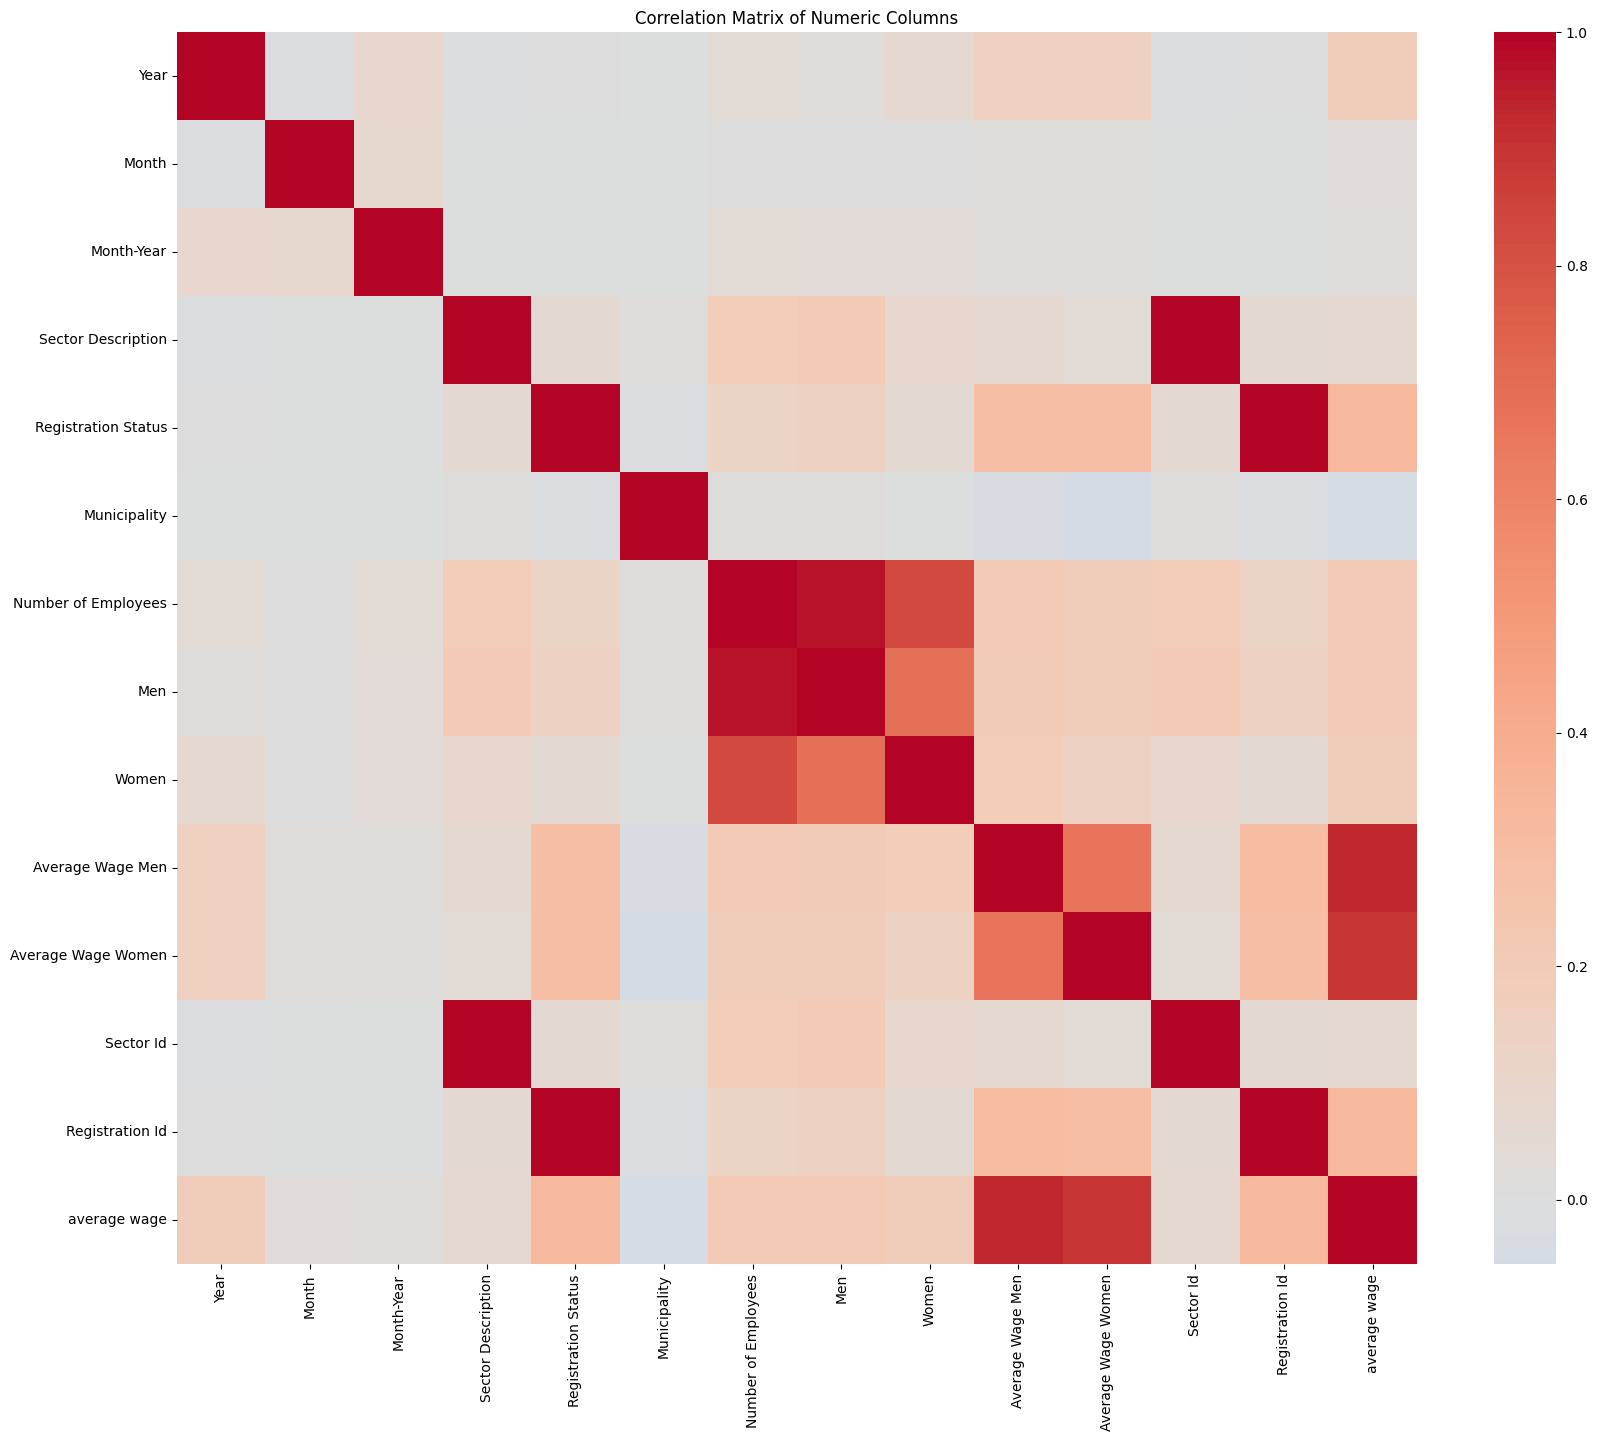

                         Year     Month  Month-Year  Sector Description  \
Year                 1.000000 -0.016415    0.083336           -0.010365   
Month               -0.016415  1.000000    0.075316           -0.001878   
Month-Year           0.083336  0.075316    1.000000            0.001462   
Sector Description  -0.010365 -0.001878    0.001462            1.000000   
Registration Status  0.005559  0.000268   -0.001149            0.060726   
Municipality        -0.004748 -0.000316    0.001986            0.017253   
Number of Employees  0.041001  0.004959    0.040532            0.182752   
Men                  0.025324  0.005140    0.037576            0.206942   
Women                0.069802  0.003368    0.038359            0.081277   
Average Wage Men     0.157181  0.024914    0.019040            0.070187   
Average Wage Women   0.157617  0.025690    0.017230            0.047525   
Sector Id           -0.010365 -0.001878    0.001462            1.000000   
Registration Id      0.00

In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

# Load the dataset
file_path = 'final.csv'
df = pd.read_csv(file_path)

df = df.drop('anomaly', axis=1)

print(df.head())
print(df.info())

# List of columns to be label encoded
categorical_columns = ['Month-Year', 'Sector Description', 'Registration Status', 'Municipality']

# Label encode the categorical columns
label_encoders = {}
for column in categorical_columns:
    label_encoders[column] = LabelEncoder()
    df[column] = label_encoders[column].fit_transform(df[column])

# Convert all remaining columns to numeric where possible
for column in df.columns:
    if df[column].dtype == 'object':
        df[column] = pd.to_numeric(df[column], errors='coerce')

# Drop rows with missing values in any column
df = df.dropna()

# Select only numeric columns for the correlation matrix
numeric_columns = df.select_dtypes(include=[np.number])

# Compute the correlation matrix
correlation_matrix = numeric_columns.corr()

# Plot the correlation matrix for columns
plt.figure(figsize=(20, 16))
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm', center=0)
plt.title('Correlation Matrix of Numeric Columns')
plt.show()

print(correlation_matrix)


In [17]:
df.to_csv('isitfinal.csv', index=False)

In [22]:
employment_no_outliers = employment_no_outliers.drop('anomaly', axis=1)
# employment_no_outliers.to_csv('final2.csv', index=False)

In [24]:
employment_no_outliers.info()
employment_no_outliers.to_csv('final2.csv', index=False)

<class 'pandas.core.frame.DataFrame'>
Index: 60938 entries, 1 to 88012
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Year                 60938 non-null  int64  
 1   Month                60938 non-null  int64  
 2   Month-Year           60938 non-null  object 
 3   Sector Description   60938 non-null  object 
 4   Registration Status  60938 non-null  object 
 5   Municipality         60938 non-null  object 
 6   Number of Employees  60938 non-null  int64  
 7   Men                  60938 non-null  int64  
 8   Women                60938 non-null  int64  
 9   Average Wage Men     60938 non-null  float64
 10  Average Wage Women   60938 non-null  float64
 11  Sector Id            60938 non-null  int64  
 12  Registration Id      60938 non-null  int64  
 13  average wage         60938 non-null  float64
dtypes: float64(3), int64(7), object(4)
memory usage: 9.0+ MB


In [27]:
employment_no_outliers['Registration Status'].nunique()

29

In [26]:
employment_no_outliers['Sector Description'].nunique()

22

In [29]:
employment_no_outliers['Municipality'].nunique()

38

In [30]:
!pip install tensorflow

In [32]:
data = pd.read_csv('final2.csv')

data = data.drop('Month-Year', axis=1)

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60938 entries, 0 to 60937
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Year                 60938 non-null  int64  
 1   Month                60938 non-null  int64  
 2   Sector Description   60938 non-null  object 
 3   Registration Status  60938 non-null  object 
 4   Municipality         60938 non-null  object 
 5   Number of Employees  60938 non-null  int64  
 6   Men                  60938 non-null  int64  
 7   Women                60938 non-null  int64  
 8   Average Wage Men     60938 non-null  float64
 9   Average Wage Women   60938 non-null  float64
 10  Sector Id            60938 non-null  int64  
 11  Registration Id      60938 non-null  int64  
 12  average wage         60938 non-null  float64
dtypes: float64(3), int64(7), object(3)
memory usage: 6.0+ MB


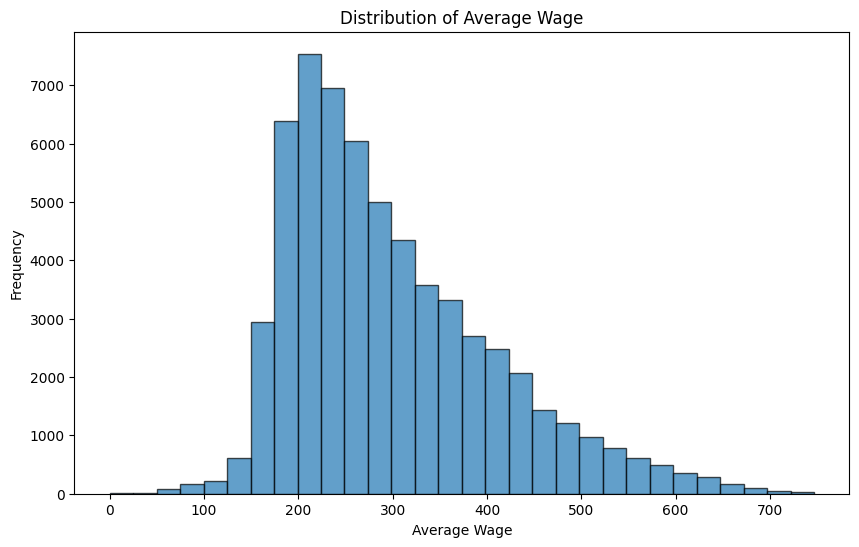

In [46]:
import pandas as pd
import matplotlib.pyplot as plt

# Load your dataset
data = pd.read_csv('final2.csv')

# Plot the distribution of average wage
plt.figure(figsize=(10, 6))
plt.hist(data['average wage'], bins=30, edgecolor='k', alpha=0.7)
plt.title('Distribution of Average Wage')
plt.xlabel('Average Wage')
plt.ylabel('Frequency')
plt.show()

In [72]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical

# Load your dataset
# Replace 'your_dataset.csv' with your actual file path
data = pd.read_csv('final2.csv')

data = data.drop('Month-Year', axis=1)

# average wage:

# Define bins for average wage to categorize into low, medium, high
bins = [0, 200, 500, np.inf]
labels = [0, 1, 2]  # 0: Low, 1: Medium, 2: High
data['wage_category'] = pd.cut(data['average wage'], bins=bins, labels=labels)

# Drop rows with missing wage categories
data = data.dropna(subset=['wage_category'])

# Check the distribution of the target variable
print(data['wage_category'].value_counts())

# One-hot encoding for categorical variables
categorical_features = ['Sector Description', 'Registration Status', 'Municipality']
one_hot_encoder = OneHotEncoder(sparse=False, drop='first')
encoded_features = one_hot_encoder.fit_transform(data[categorical_features])

# Create a DataFrame for the encoded features
encoded_df = pd.DataFrame(encoded_features, columns=one_hot_encoder.get_feature_names_out(categorical_features))

# Concatenate the encoded features with the original data
data = pd.concat([data, encoded_df], axis=1)

# Drop the original categorical columns
data.drop(columns=categorical_features, inplace=True)

data.to_csv('final3.csv', index=False)

# Define the feature columns and target column
X = data.drop(columns=['average wage', 'wage_category'])
y = data['wage_category']

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Convert labels to categorical one-hot encoding
y_categorical = to_categorical(y)

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_categorical, test_size=0.4, random_state=42)

# Check the distribution in training and test sets
print(pd.Series(np.argmax(y_train, axis=1)).value_counts())
print(pd.Series(np.argmax(y_test, axis=1)).value_counts())

# Build the neural network model
model = Sequential()
model.add(Dense(64, input_dim=X_train.shape[1], activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(y_categorical.shape[1], activation='softmax'))  # Output layer for classification

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, epochs=5, batch_size=32, validation_split=0.2)

# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {accuracy}")

# Predicting the values
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_test, axis=1)

# Calculate precision, recall, and f1 score
precision = precision_score(y_true, y_pred_classes, average='weighted')
recall = recall_score(y_true, y_pred_classes, average='weighted')
f1 = f1_score(y_true, y_pred_classes, average='weighted')

print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")


wage_category
1    45816
0    11360
2     3762
Name: count, dtype: int64


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


1    27531
0     6783
2     2248
Name: count, dtype: int64
1    18285
0     4577
2     1514
Name: count, dtype: int64
Epoch 1/5
915/915 [==============================] - 4s 4ms/step - loss: 0.2632 - accuracy: 0.8986 - val_loss: 0.1136 - val_accuracy: 0.9577
Epoch 2/5
915/915 [==============================] - 2s 3ms/step - loss: 0.0891 - accuracy: 0.9661 - val_loss: 0.0841 - val_accuracy: 0.9676
Epoch 3/5
915/915 [==============================] - 2s 2ms/step - loss: 0.0702 - accuracy: 0.9719 - val_loss: 0.0777 - val_accuracy: 0.9732
Epoch 4/5
915/915 [==============================] - 2s 2ms/step - loss: 0.0588 - accuracy: 0.9768 - val_loss: 0.0709 - val_accuracy: 0.9754
Epoch 5/5
762/762 [==============================] - 1s 2ms/step - loss: 0.0742 - accuracy: 0.9713
Test Accuracy: 0.9712832570075989
762/762 [==============================] - 2s 2ms/step
Precision: 0.9722647490420612
Recall: 0.9712832294059731
F1 Score: 0.9715646480520717


Logistic Regression

In [73]:
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score

# Convert one-hot encoded labels back to categorical labels
y_train_labels = np.argmax(y_train, axis=1)
y_test_labels = np.argmax(y_test, axis=1)

# Determine the threshold for binary classification
threshold = np.median(y_train_labels)
y_train_class = (y_train_labels > threshold).astype(int)
y_test_class = (y_test_labels > threshold).astype(int)

# Train the logistic regression model
log_model = LogisticRegression()
log_model.fit(X_train, y_train_class)
log_predictions = log_model.predict(X_test)

# Calculate classification metrics
accuracy = accuracy_score(y_test_class, log_predictions)
recall = recall_score(y_test_class, log_predictions)
precision = precision_score(y_test_class, log_predictions)
f1 = f1_score(y_test_class, log_predictions)

print(f"Accuracy: {accuracy}")
print(f"Recall: {recall}")
print(f"Precision: {precision}")
print(f"F1 Score: {f1}")


Accuracy: 0.9981949458483754
Recall: 0.9841479524438573
Precision: 0.9867549668874173
F1 Score: 0.9854497354497355


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Decision Tree

In [74]:
import numpy as np
from sklearn.metrics import accuracy_score, recall_score, f1_score, precision_score
from sklearn.tree import DecisionTreeClassifier

# Decision Tree Classifier for actual classification tasks
dtc_model = DecisionTreeClassifier()
dtc_model.fit(X_train, y_train_class)
dtc_predictions = dtc_model.predict(X_test)

# Calculate classification metrics
accuracy = accuracy_score(y_test_class, dtc_predictions)
recall = recall_score(y_test_class, dtc_predictions)
precision = precision_score(y_test_class, dtc_predictions)
f1 = f1_score(y_test_class, dtc_predictions)

print(f"Accuracy: {accuracy}")
print(f"Recall: {recall}")
print(f"Precision: {precision}")
print(f"F1 Score: {f1}")


Accuracy: 0.9980308500164096
Recall: 0.9828269484808454
Precision: 0.9854304635761589
F1 Score: 0.984126984126984


Random Forest Classifier

In [75]:
import numpy as np
from sklearn.metrics import accuracy_score, recall_score, f1_score, precision_score
from sklearn.ensemble import RandomForestClassifier

# Random Forest Classifier for actual classification tasks
rfc_model = RandomForestClassifier(n_estimators=100)
rfc_model.fit(X_train, y_train_class)
rfc_predictions = rfc_model.predict(X_test)

# Calculate classification metrics
accuracy = accuracy_score(y_test_class, rfc_predictions)
recall = recall_score(y_test_class, rfc_predictions)
precision = precision_score(y_test_class, rfc_predictions)
f1 = f1_score(y_test_class, rfc_predictions)

print(f"Accuracy: {accuracy}")
print(f"Recall: {recall}")
print(f"Precision: {precision}")
print(f"F1 Score: {f1}")


Accuracy: 0.9942976698391861
Recall: 0.9346103038309115
Precision: 0.9725085910652921
F1 Score: 0.9531828898619065


Support Vector Machine Classifier

In [76]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, recall_score, f1_score, precision_score

# Support Vector Machine Model for classification
svm_classifier = SVC()
svm_classifier.fit(X_train, y_train_class)  # y_train_class should be a binary label for classification
svm_predictions = svm_classifier.predict(X_test)

# Calculate classification metrics
accuracy = accuracy_score(y_test_class, svm_predictions)
recall = recall_score(y_test_class, svm_predictions)
precision = precision_score(y_test_class, svm_predictions)
f1 = f1_score(y_test_class, svm_predictions)

print(f"Accuracy: {accuracy}")
print(f"Recall: {recall}")
print(f"Precision: {precision}")
print(f"F1 Score: {f1}")


Accuracy: 0.9890876271742698
Recall: 0.8850726552179656
Precision: 0.9357541899441341
F1 Score: 0.9097080787508486


KNeighbors Classifier

In [77]:
from sklearn.neighbors import KNeighborsClassifier

# k-NN Model for classification
knn_classifier = KNeighborsClassifier(n_neighbors=3)
knn_classifier.fit(X_train, y_train_class)  # y_train_class should be a binary label for classification
knn_predictions = knn_classifier.predict(X_test)

# Calculate classification metrics
accuracy = accuracy_score(y_test_class, knn_predictions)
recall = recall_score(y_test_class, knn_predictions)
precision = precision_score(y_test_class, knn_predictions)
f1 = f1_score(y_test_class, knn_predictions)

print(f"Accuracy: {accuracy}")
print(f"Recall: {recall}")
print(f"Precision: {precision}")
print(f"F1 Score: {f1}")


Accuracy: 0.9832622251394815
Recall: 0.8157199471598415
Precision: 0.905425219941349
F1 Score: 0.8582348853370396


Gradient Boosting Classifier

In [78]:
from sklearn.ensemble import GradientBoostingClassifier

# Gradient Boosting Classifier
gb_classifier = GradientBoostingClassifier(n_estimators=100)
gb_classifier.fit(X_train, y_train_class)  # Assuming y_train_class is prepared for classification
gb_predictions = gb_classifier.predict(X_test)

# Calculate classification metrics
accuracy = accuracy_score(y_test_class, gb_predictions)
recall = recall_score(y_test_class, gb_predictions)
precision = precision_score(y_test_class, gb_predictions)
f1 = f1_score(y_test_class, gb_predictions)

print(f"Accuracy: {accuracy}")
print(f"Recall: {recall}")
print(f"Precision: {precision}")
print(f"F1 Score: {f1}")


Accuracy: 0.9979898260584181
Recall: 0.9795244385733157
Precision: 0.9880079946702198
F1 Score: 0.9837479270315092
